In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # using for importing dataset

## **Why Seaborn when we have matplotlib?**

- provides a layer of abstraction above matplotlib hence simpler to use
- less code , more result
- better aesthetics(visuals are better than matplotlib)
- more graphs included (box plots, violin plots, different statisticals plots)


#### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

For all axis level function we can give figure size like we used to give in matplotlib

**Main Classification of Graphs which needs to study**

- Relational Plot (Scatter Plot, Line Plot)
- Distribution Plot (Histogram, KDEPlot, Rug Plot)
- Categorical Plot (Bar Chart, Count Plot, Box Plot, Violin Plot, Swarn Plot)
- Regression Plot (residuals of a linear regression, regplot)
- Matrix Plot (Heat Map, Cluster Map)
- Multiplots (Join Plot, Pair Plot)

_Surprisingly Seaborn Does not have Pie Chart_


## **Relational Plot**

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot


In [2]:
"""
Scatter Plots
"""

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

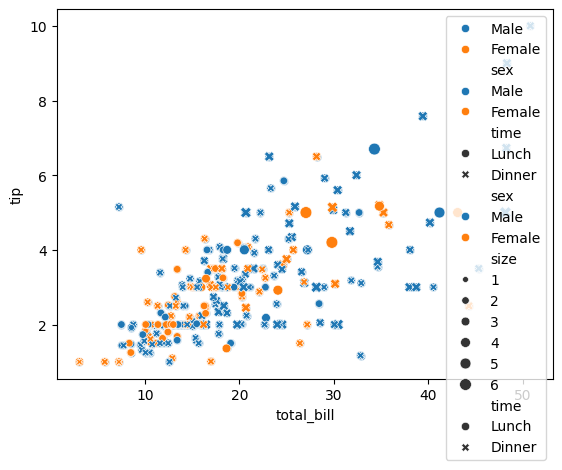

In [3]:
# Scatter plot of total bills and tips
# Scatter Plot --> Axis level function


sns.scatterplot(data=tips, x="total_bill", y="tip")
# See in the below graph we dont need to specify the x & y labels

"""Customization"""

# Change color based on some criteria(hue)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

# Change marker based on some criteria(style)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="time")

# Change the size of marker (size)
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="sex", style="time", size="size"
)

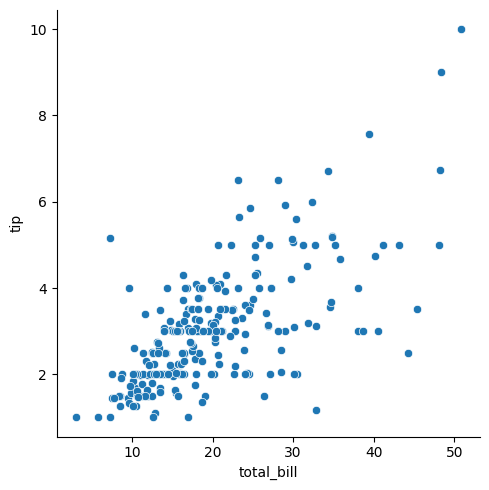

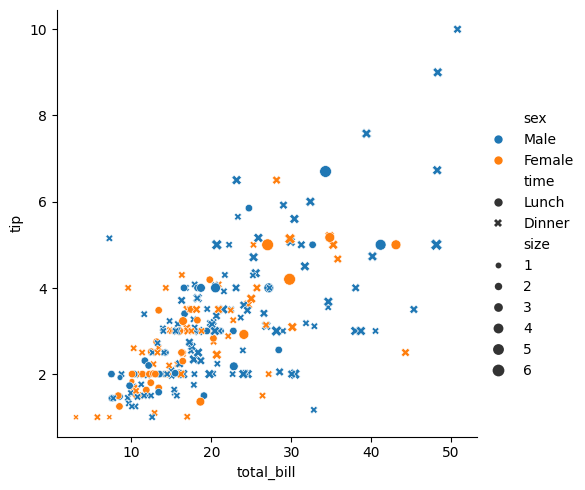

In [4]:
# Same plot with Figure Level
# Relplot is a Figure level Function

sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter")

"""Same Customization can also be done here"""
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter",
    hue="sex",
    style="time",
    size="size",
)

**Seaborn Recommend us to use figure level functions, because with the help of figure level we can create multiple axes functions just by changing kind**

- By Default figure level plots are sqaurish in shape


The only difference between scatter plot and line plot is when we connects the points of the scatter plot through line then it become a line plot and this is generally done when we have _time related data on axis_


In [5]:
"""
Line Plot
"""

gap_data = px.data.gapminder()
gap_data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [6]:
gap_data.groupby("country")["lifeExp"].mean()["India"]

np.float64(53.16608333333334)

In [7]:
# Life Exp of India after 1992

temp = gap_data[gap_data["country"] == "India"]
temp

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356
701,India,Asia,1977,54.208,634000000,813.337323,IND,356
702,India,Asia,1982,56.596,708000000,855.723538,IND,356
703,India,Asia,1987,58.553,788000000,976.512676,IND,356
704,India,Asia,1992,60.223,872000000,1164.406809,IND,356
705,India,Asia,1997,61.765,959000000,1458.817442,IND,356


<Axes: xlabel='year', ylabel='lifeExp'>

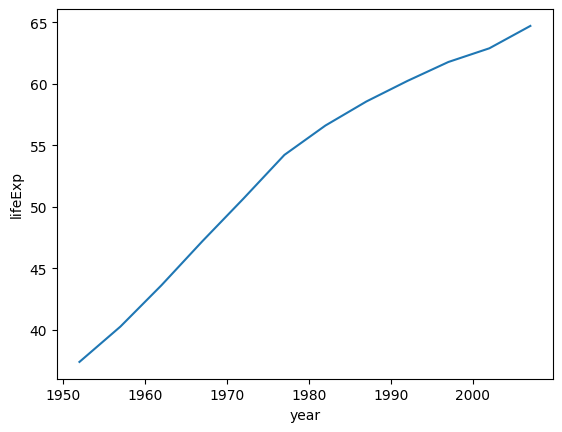

In [8]:
# Axis Level

sns.lineplot(data=temp, x="year", y="lifeExp")

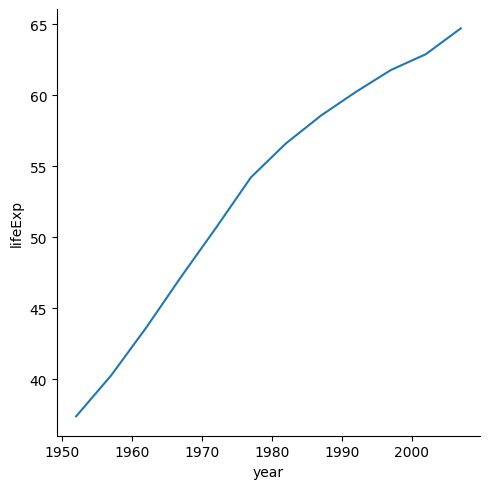

In [9]:
# Using Fig Level

sns.relplot(data=temp, x="year", y="lifeExp", kind="line")

In [10]:
# 3 Countries lifeExpt side by side

temp = gap_data[gap_data["country"].isin(["India", "Pakistan", "China"])]
temp

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
288,China,Asia,1952,44.00000,556263527,400.448611,CHN,156
289,China,Asia,1957,50.54896,637408000,575.987001,CHN,156
290,China,Asia,1962,44.50136,665770000,487.674018,CHN,156
291,China,Asia,1967,58.38112,754550000,612.705693,CHN,156
292,China,Asia,1972,63.11888,862030000,676.900092,CHN,156
293,China,Asia,1977,63.96736,943455000,741.237470,CHN,156
294,China,Asia,1982,65.52500,1000281000,962.421381,CHN,156
295,China,Asia,1987,67.27400,1084035000,1378.904018,CHN,156
296,China,Asia,1992,68.69000,1164970000,1655.784158,CHN,156
297,China,Asia,1997,70.42600,1230075000,2289.234136,CHN,156


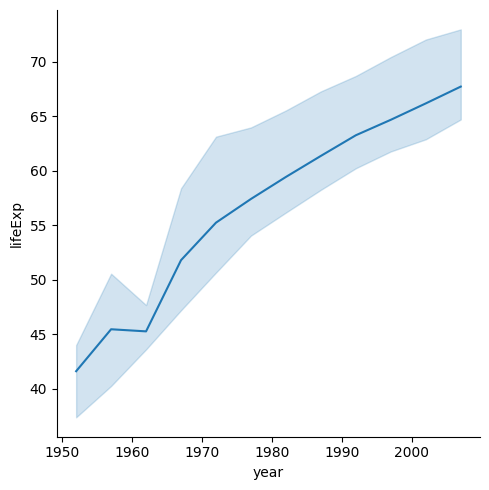

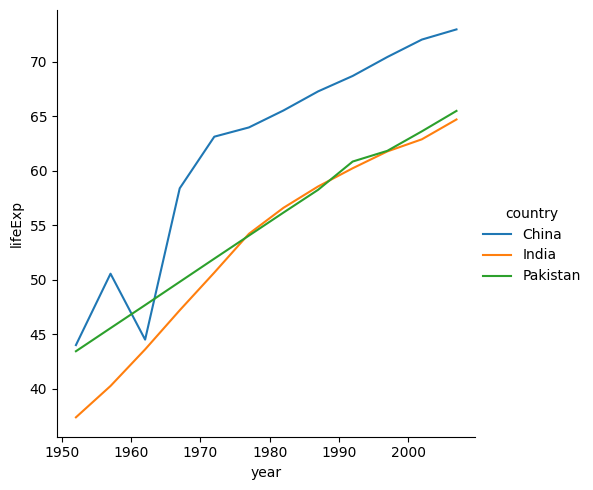

In [11]:
sns.relplot(data=temp, x="year", y="lifeExp", kind="line")

sns.relplot(data=temp, x="year", y="lifeExp", kind="line", hue="country")

- On Figure Level Plot the Legends are Outside the Graph
- On Axis Level Plot the legends are inside the Graph


<Axes: xlabel='year', ylabel='lifeExp'>

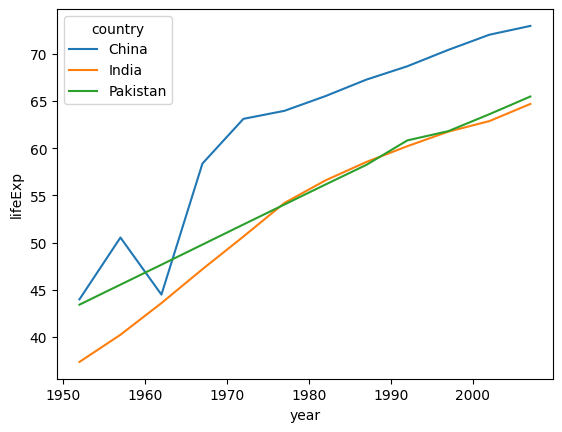

In [12]:
sns.lineplot(data=temp, x="year", y="lifeExp", hue="country")

In [13]:
# Lets do the same for 3 different continent

temp = gap_data[gap_data["country"].isin(["India", "Germany", "Brazil"])]
temp

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
169,Brazil,Americas,1957,53.285,65551171,2487.365989,BRA,76
170,Brazil,Americas,1962,55.665,76039390,3336.585802,BRA,76
171,Brazil,Americas,1967,57.632,88049823,3429.864357,BRA,76
172,Brazil,Americas,1972,59.504,100840058,4985.711467,BRA,76
173,Brazil,Americas,1977,61.489,114313951,6660.118654,BRA,76
174,Brazil,Americas,1982,63.336,128962939,7030.835878,BRA,76
175,Brazil,Americas,1987,65.205,142938076,7807.095818,BRA,76
176,Brazil,Americas,1992,67.057,155975974,6950.283021,BRA,76
177,Brazil,Americas,1997,69.388,168546719,7957.980824,BRA,76


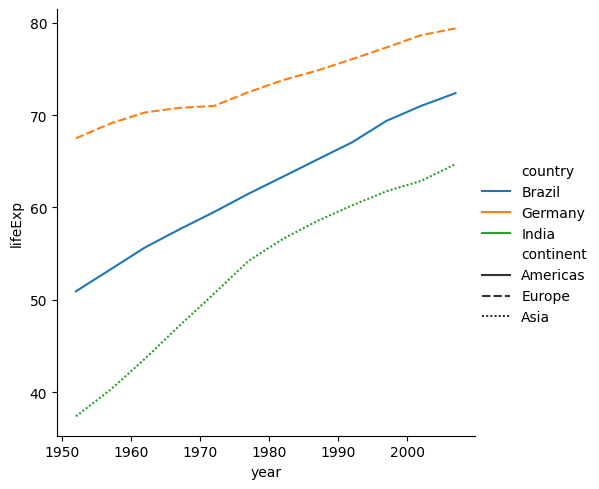

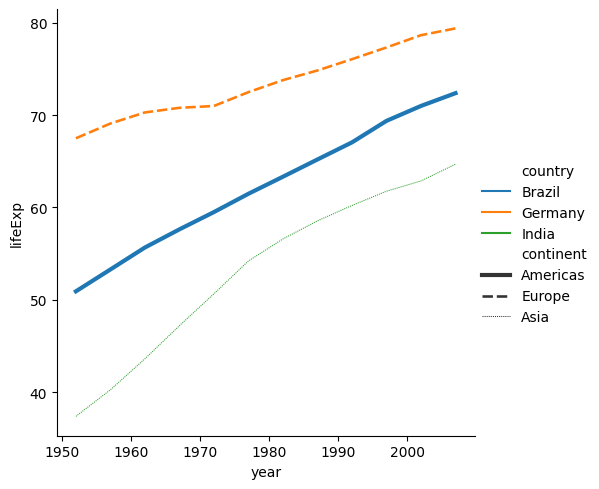

In [14]:
sns.relplot(
    data=temp, x="year", y="lifeExp", kind="line", hue="country", style="continent"
)

# We can also add a size parameter to change line thickness


sns.relplot(
    data=temp,
    x="year",
    y="lifeExp",
    kind="line",
    hue="country",
    style="continent",
    size="continent",
)

<Axes: xlabel='year', ylabel='lifeExp'>

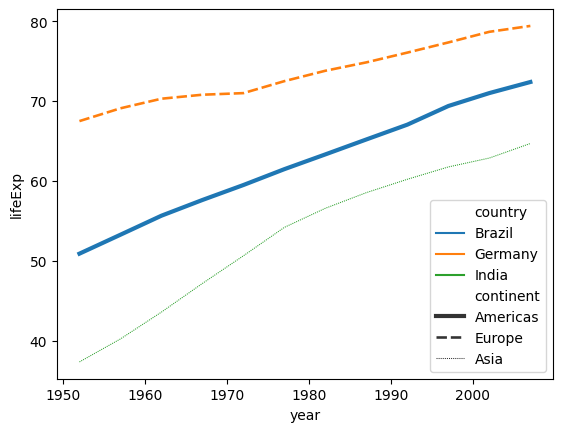

In [15]:
# sns.lineplot(data=temp, x="year", y="lifeExp",hue="country", style='continent')

# we can also provide size
sns.lineplot(
    data=temp, x="year", y="lifeExp", hue="country", style="continent", size="continent"
)

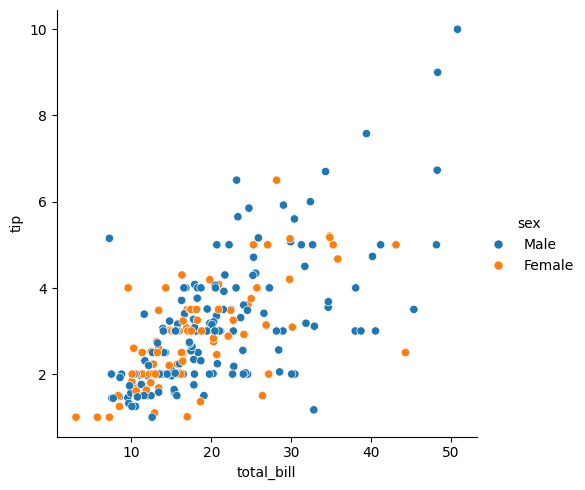

In [16]:
"""
Facet Plot : Only with Figure Level Functions

It gives the ability to plot the multiple same kind of plots on a columns
This is done by cols and rows parameter
"""
sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter", hue="sex")


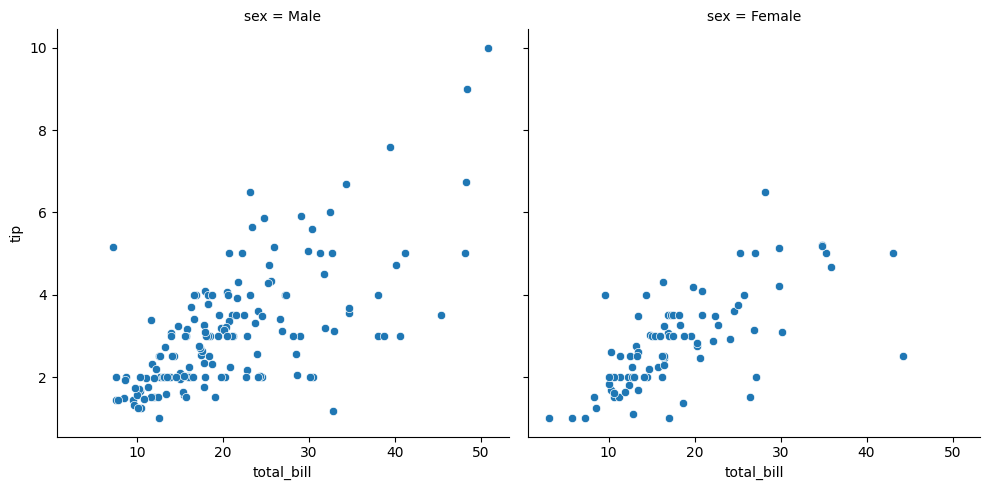

In [17]:
# Facet Plot

# Create Plots for all sex categories
sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter", col="sex")

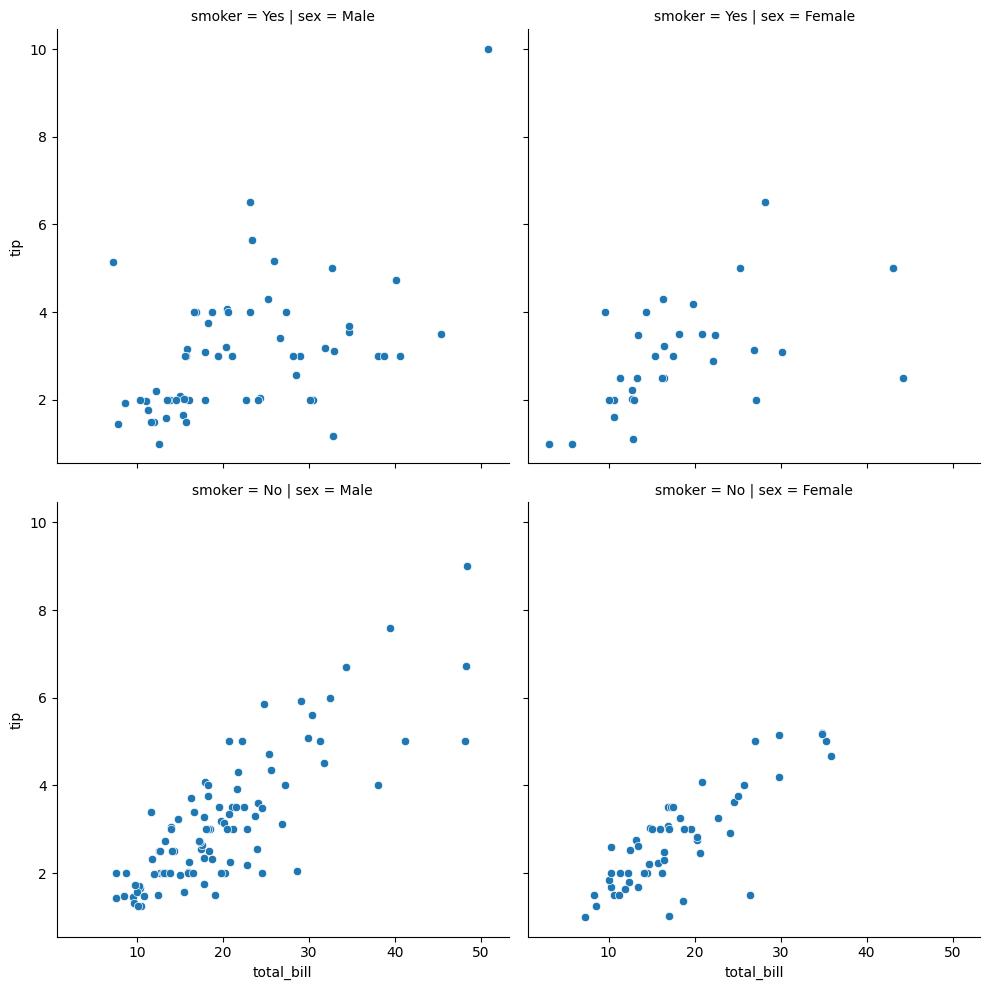

In [18]:
# Create Plots for all sex categories and smoker
sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter", row="smoker", col="sex")

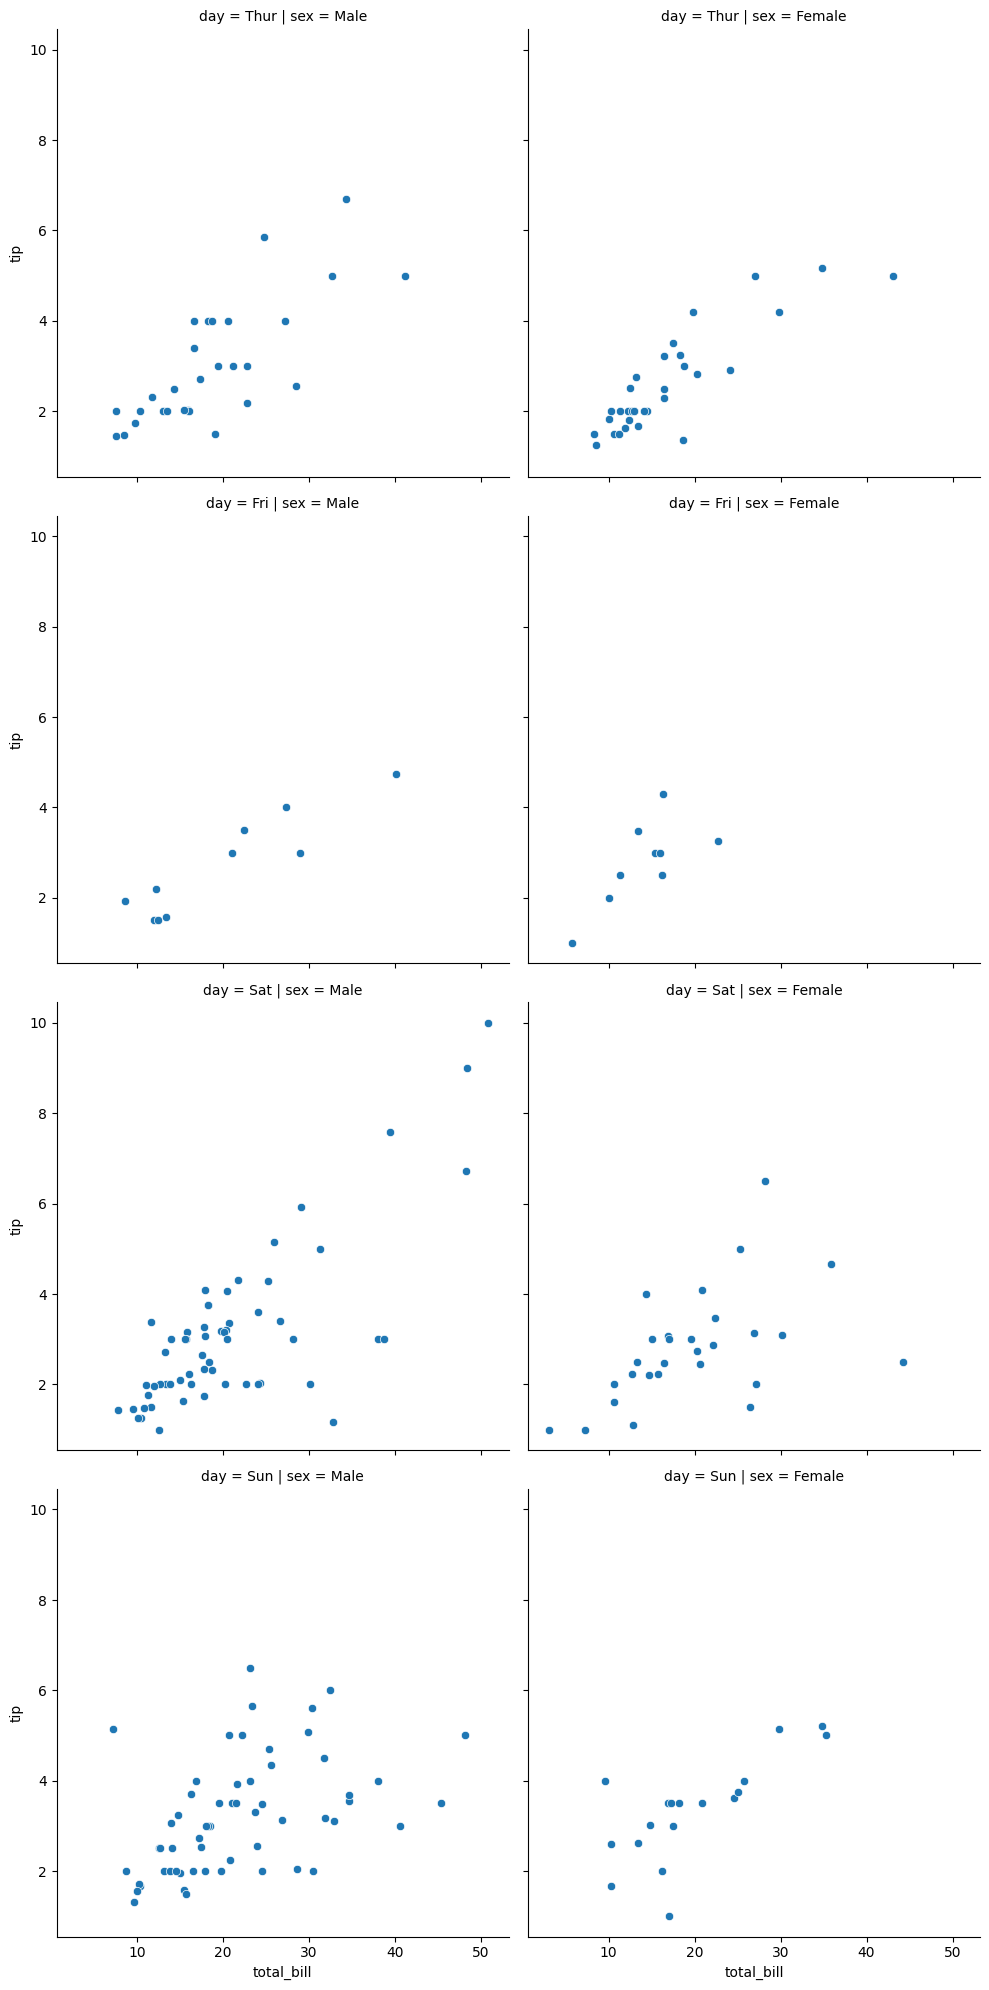

In [19]:
# Create Plots for all sex categories & days
sns.relplot(data=tips, x="total_bill", y="tip", kind="scatter", row="day", col="sex")

## **Distribution Plot**


- used for univariate analysis
- used to find out the distribution of the data, how data is seperated
- Range of the observation
- Central Tendency(mean,median,mode)
- is the data bimodal?(multiple peaks)
- Are there outliers?


Plots under distribution plot

- histplot
- kdeplot
- rugplot


#### **Hist Plot**

`Hist Plot:` Histogram use to represent frequency distribution in terms of bins.

Create Bins and then aggregate functions can be run on a category to represent frequency distribution.

We usually plot histogram on numerical cols, but we can also plot it on categorical columns

- Figure Level Function for histogram is `displot`
- Axis level functions are : `histplot, kdeplot, rugplot`


<Axes: xlabel='total_bill', ylabel='Count'>

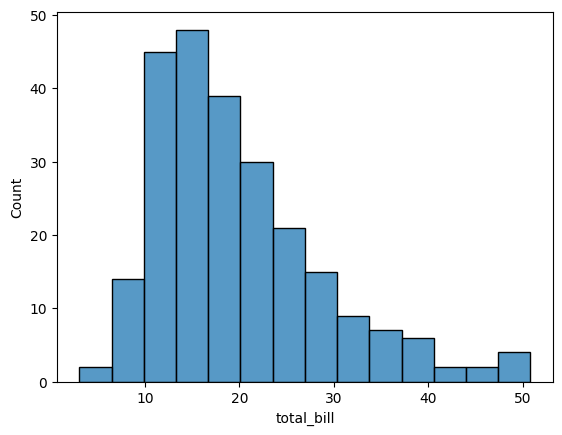

In [ ]:
# Axis Level
sns.histplot(data=tips, x="total_bill")

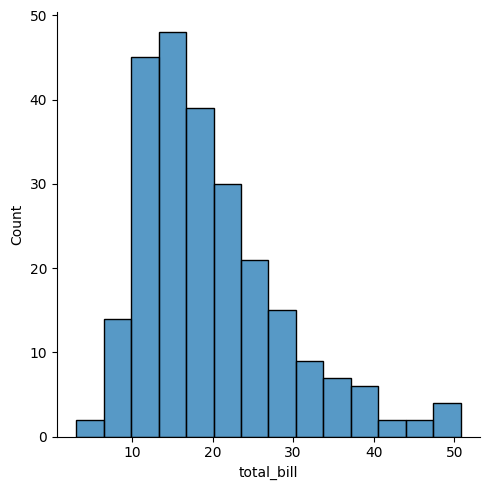

In [ ]:
# Figure Level

sns.displot(data=tips, x="total_bill", kind="hist")

<Axes: xlabel='total_bill', ylabel='Count'>

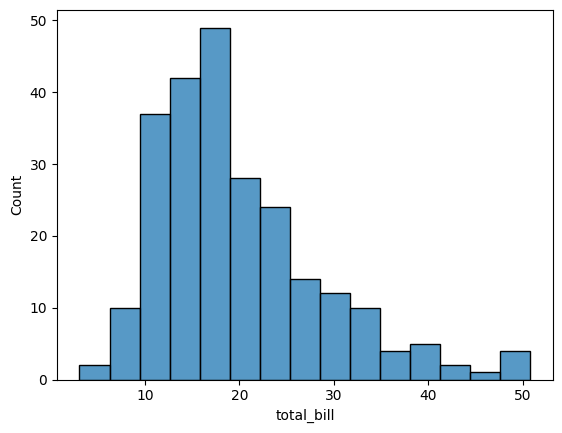

In [ ]:
"""
Customization
- bins
- hue
- element(for changing outlines when hue is applied)
"""

sns.histplot(data=tips, x="total_bill", bins=15)

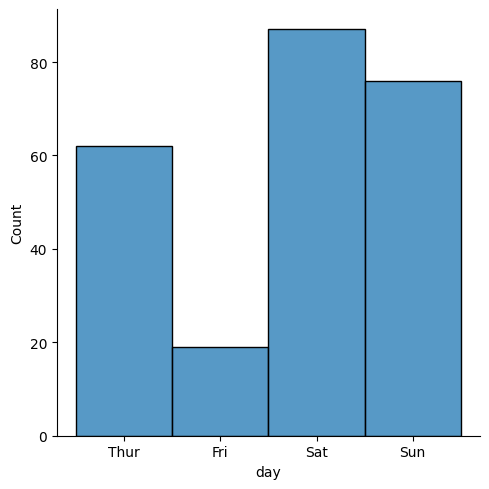

In [ ]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram.
# Discrete bins are automatically set for categorical variables

# countplot: the below is the count plot because it represent the value count of categorical values
sns.displot(data=tips, x="day", kind="hist")

<Axes: xlabel='total_bill', ylabel='Count'>

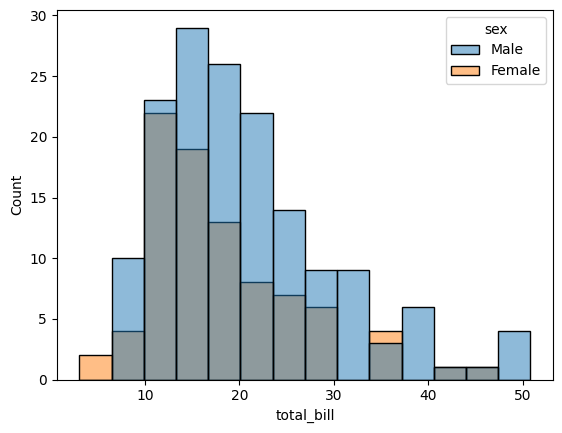

In [ ]:
# total bill of male and female bills

sns.histplot(data=tips, x="total_bill", hue="sex")

<Axes: xlabel='tip', ylabel='Count'>

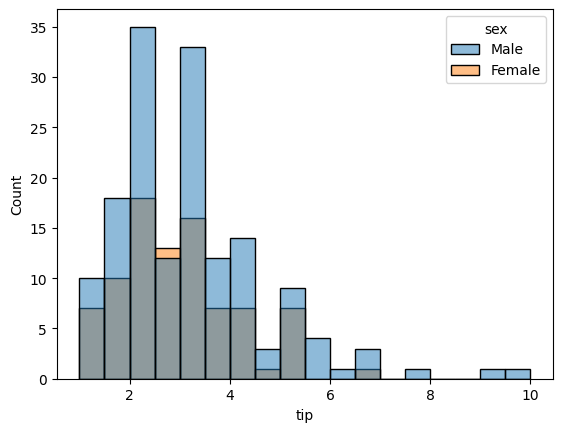

In [ ]:
sns.histplot(data=tips, x="tip", hue="sex")

<Axes: xlabel='tip', ylabel='Count'>

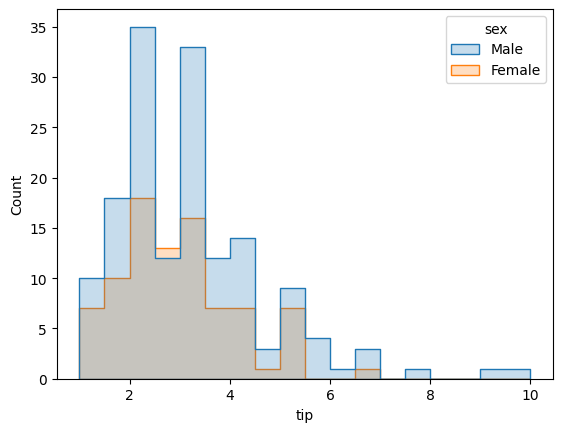

In [ ]:
# element

sns.histplot(data=tips, x="tip", hue="sex", element="step")

In [ ]:
# Lets load titanic dataset

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

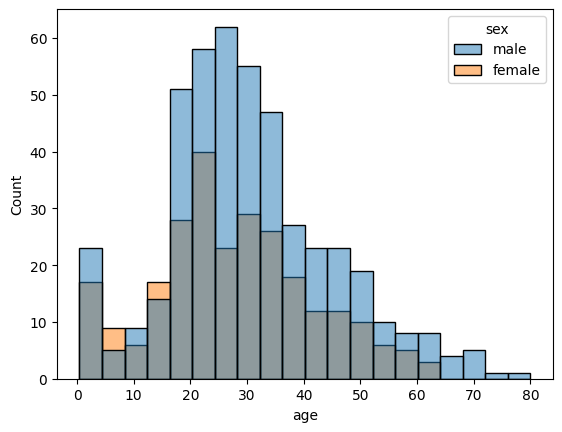

In [34]:
# plot the histogram of age

sns.histplot(data=titanic, x="age", hue="sex")

<Axes: xlabel='age', ylabel='Count'>

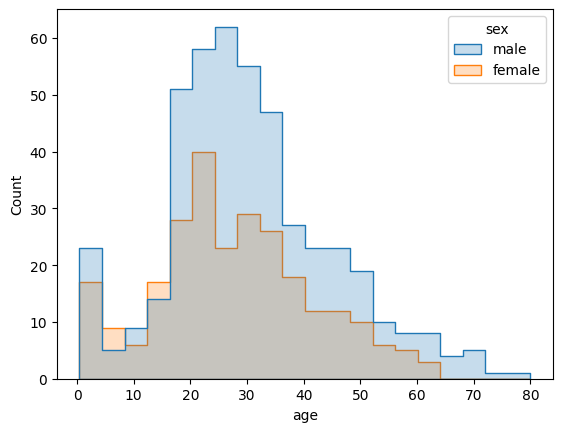

In [ ]:
sns.histplot(data=titanic, x="age", hue="sex", element="step")

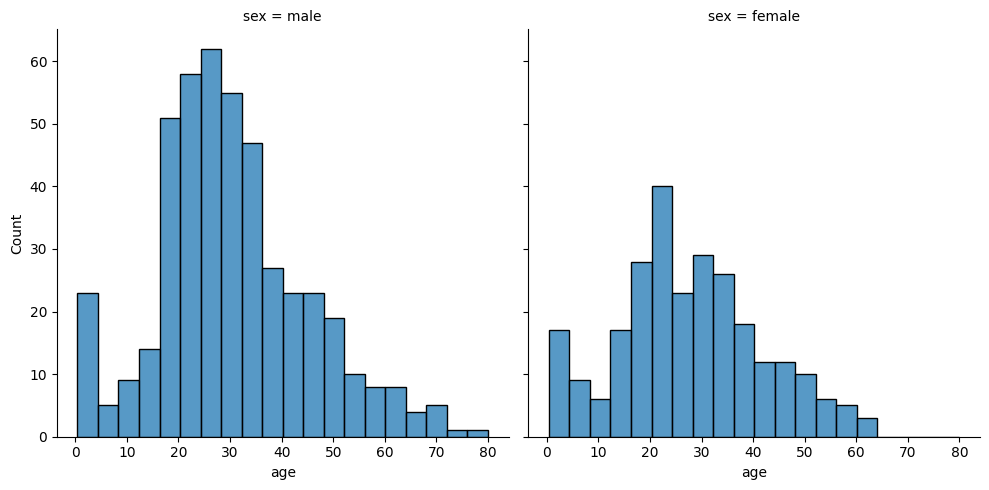

In [ ]:
"""
Facet Plot can also be used
"""

sns.displot(data=titanic, kind="hist", col="sex", x="age")

#### **KDE Plot**


_Kernal Density Estimation_

Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

Rather than bars it shows smooth curve (bell curve)

- Roughly we get the probability on other axis


<Axes: xlabel='total_bill', ylabel='Density'>

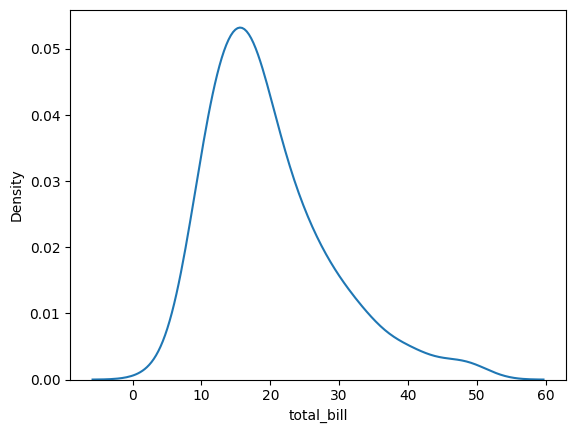

In [37]:
sns.kdeplot(data=tips, x="total_bill")

**Now in this since we have a continous value thus we can still estimate some values which are not present in our data due to this continous line**


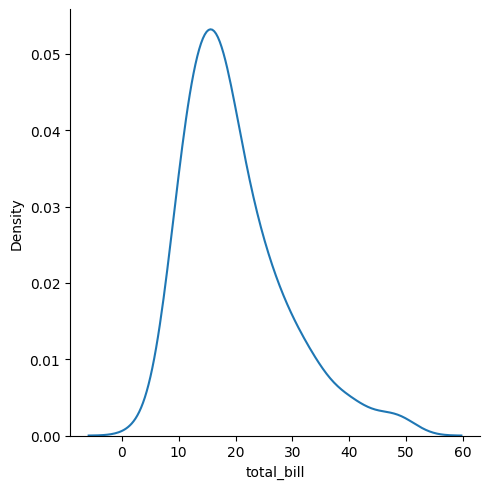

In [ ]:
sns.displot(data=tips, kind="kde", x="total_bill")

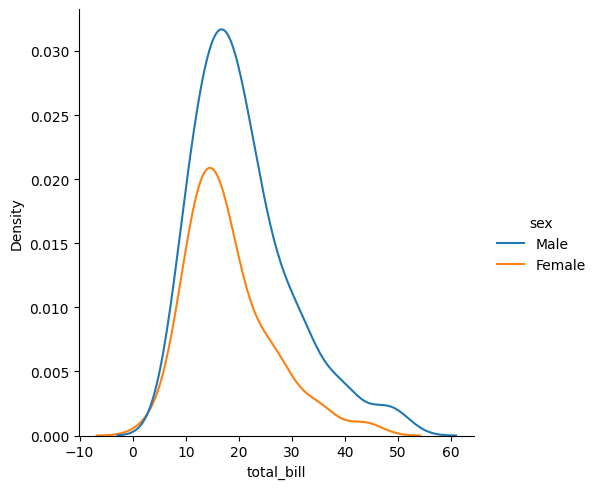

In [ ]:
sns.displot(data=tips, kind="kde", x="total_bill", hue="sex")

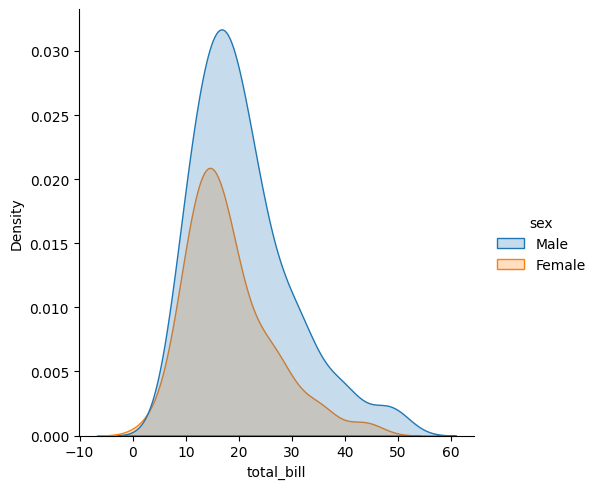

In [ ]:
# fill is used to fill the area

sns.displot(data=tips, kind="kde", x="total_bill", hue="sex", fill=True)

#### **Rugplot**

Rug plot is not an individual plot it works along with existing plot by plotting set of ticks defined

Plot marginal distributions by drawing ticks along the x and y axes.

This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.

```python
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')
```


<Axes: xlabel='total_bill', ylabel='Density'>

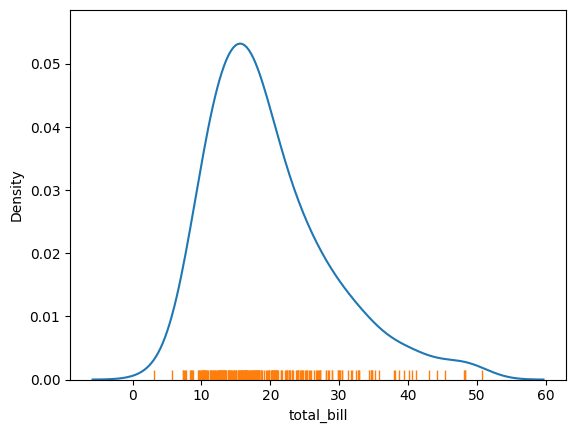

In [ ]:
# Rug Plot

sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")

# This orange is the rug plot

**Bivariate Histogram**

A bivariate histogram bins the data within rectangles that tile the plot
and then shows the count of observations within each rectangle with the fill color.

Draw two histogram horizontally and vertically and where they both intersect, it shows that area


<Axes: xlabel='total_bill', ylabel='tip'>

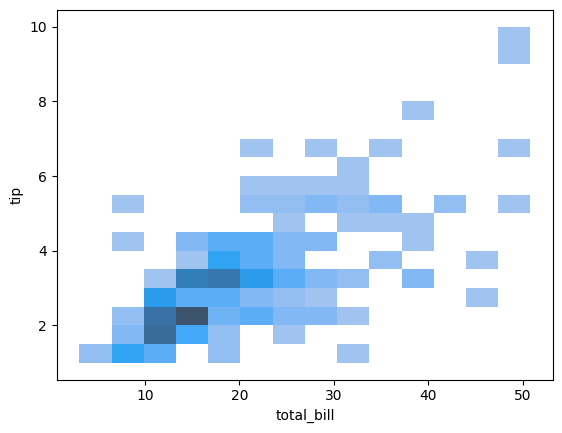

In [ ]:
# Bivariate Histogram

sns.histplot(data=tips, x="total_bill", y="tip")

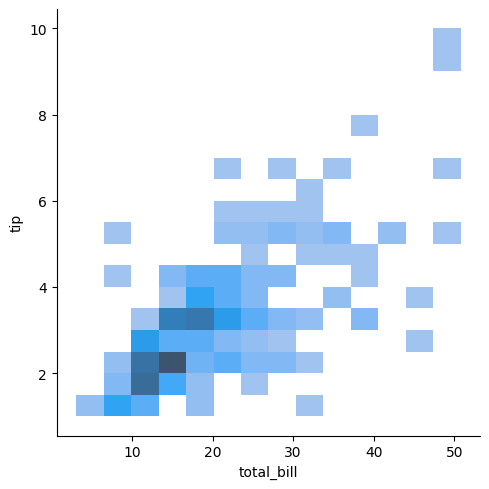

In [ ]:
sns.displot(data=tips, x="total_bill", y="tip", kind="hist")

**Bivariate KDE Plots**

A bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian, Rather than normal gaussain distribution which is in KDE plot.

- Closer the lines, Higher the density & Vice Versa


<Axes: xlabel='total_bill', ylabel='tip'>

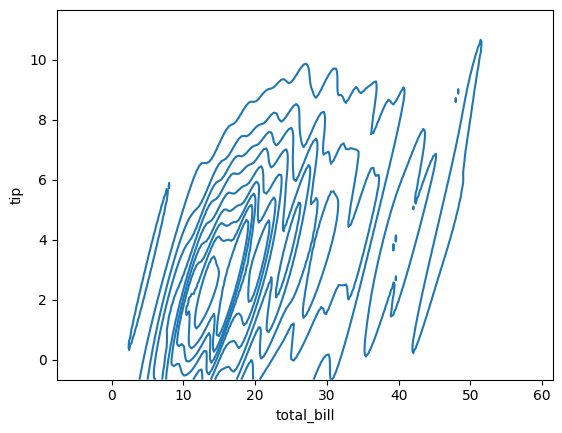

In [ ]:
sns.kdeplot(data=tips, x="total_bill", y="tip")

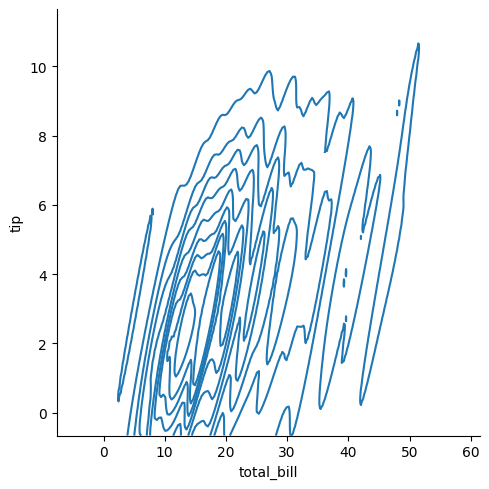

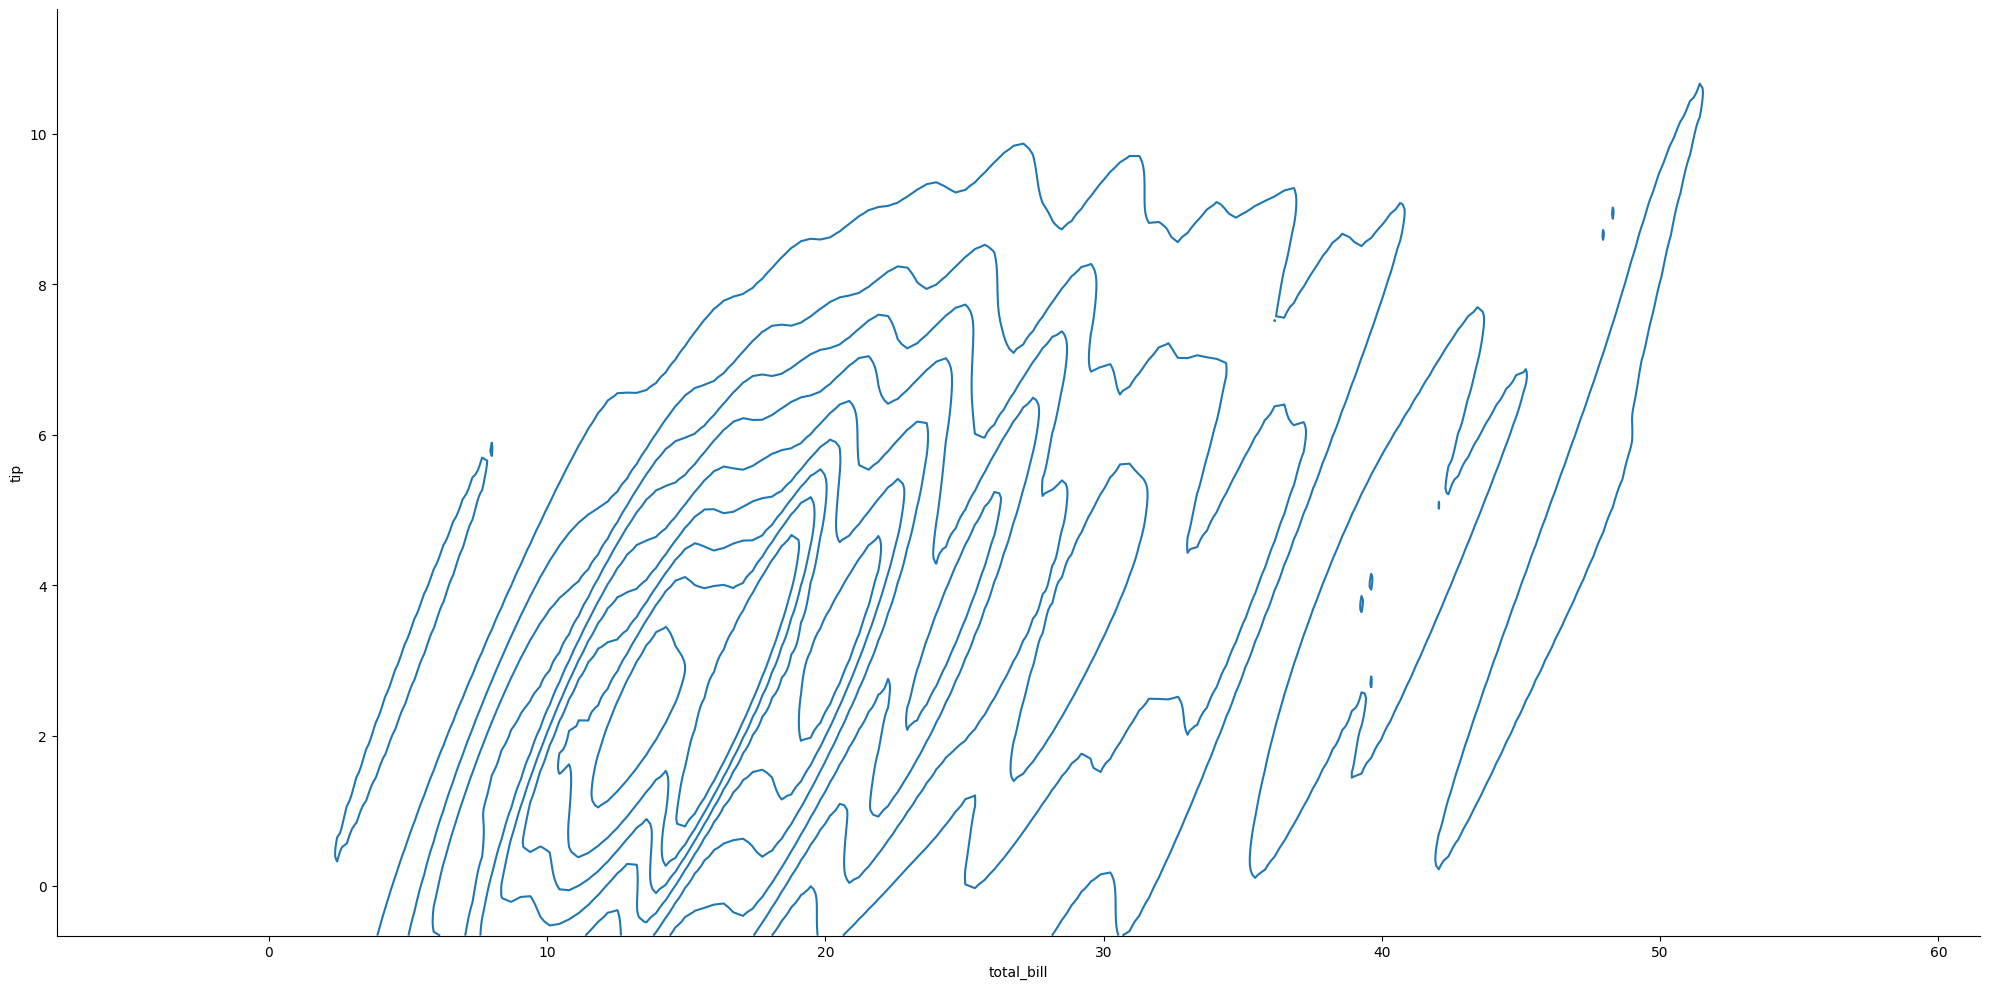

In [74]:
sns.displot(data=tips, x="total_bill", y="tip", kind="kde")

# Figure Level size changing
# height and aspect
sns.displot(data=tips, x="total_bill", y="tip", kind="kde", height=10, aspect=2)

## **Matrix Plots**

- Heatmap
- Clustermap


#### **Heat Map**

Heat map is a rectangular data as a color-encoded matrix

- Heat Map is an Axis Level, we do not have a figure level function for it


In [50]:
gap_data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


Our data is in long format first convert it to wide format using pivot


In [ ]:
temp = gap_data.pivot(index="country", columns="year", values="lifeExp")

In [53]:
temp

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


<Axes: xlabel='year', ylabel='country'>

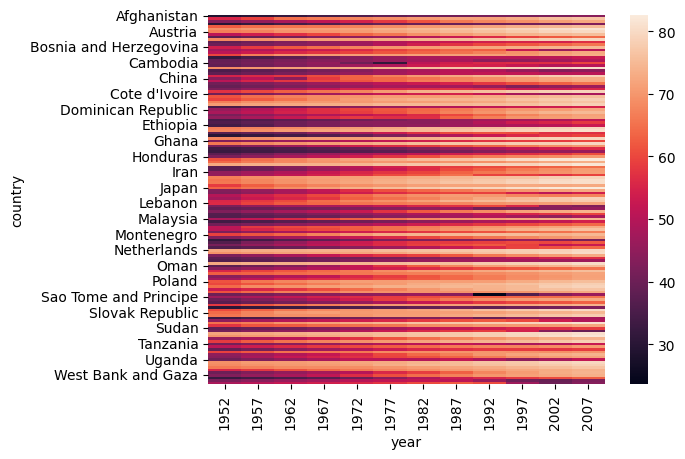

In [ ]:
sns.heatmap(data=temp)

<Axes: xlabel='year', ylabel='country'>

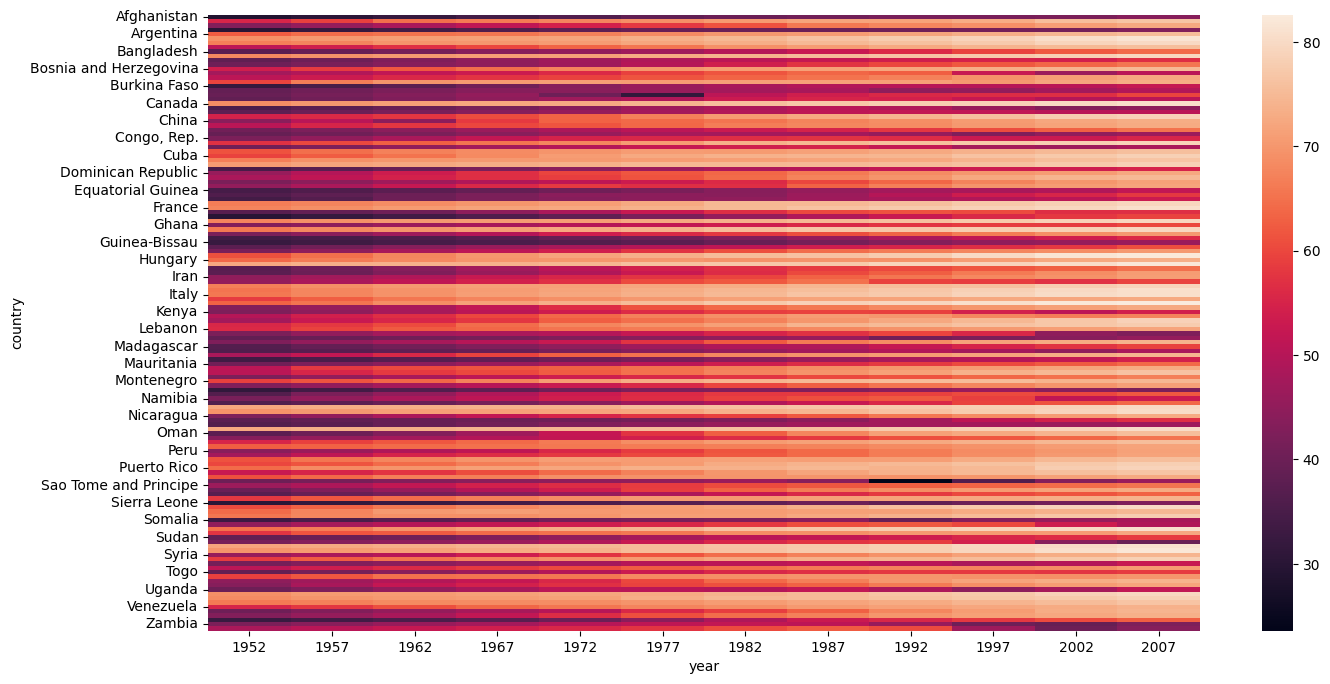

In [ ]:
# we can give figure size

plt.figure(figsize=(16, 8))
sns.heatmap(data=temp)

In [ ]:
# lets plot for specific country

temp_df = gap_data[gap_data["continent"] == "Europe"]

In [59]:
temp_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.230,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.280,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.820,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.220,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.690,2263554,3313.422188,ALB,8
...,...,...,...,...,...,...,...,...
1603,United Kingdom,Europe,1987,75.007,56981620,21664.787670,GBR,826
1604,United Kingdom,Europe,1992,76.420,57866349,22705.092540,GBR,826
1605,United Kingdom,Europe,1997,77.218,58808266,26074.531360,GBR,826
1606,United Kingdom,Europe,2002,78.471,59912431,29478.999190,GBR,826


In [ ]:
temp_df = temp_df.pivot(index="country", columns="year", values="lifeExp")

In [61]:
temp_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Austria,66.800,67.480,69.540,70.140,70.630,72.170,73.180,74.940,76.040,77.510,78.980,79.829
Belgium,68.000,69.240,70.250,70.940,71.440,72.800,73.930,75.350,76.460,77.530,78.320,79.441
Bosnia and Herzegovina,53.820,58.450,61.930,64.790,67.450,69.860,70.690,71.140,72.178,73.244,74.090,74.852
Bulgaria,59.600,66.610,69.510,70.420,70.900,70.810,71.080,71.340,71.190,70.320,72.140,73.005
Croatia,61.210,64.770,67.130,68.500,69.610,70.640,70.460,71.520,72.527,73.680,74.876,75.748
Czech Republic,66.870,69.030,69.900,70.380,70.290,70.710,70.960,71.580,72.400,74.010,75.510,76.486
Denmark,70.780,71.810,72.350,72.960,73.470,74.690,74.630,74.800,75.330,76.110,77.180,78.332
Finland,66.550,67.490,68.750,69.830,70.870,72.520,74.550,74.830,75.700,77.130,78.370,79.313


<Axes: xlabel='year', ylabel='country'>

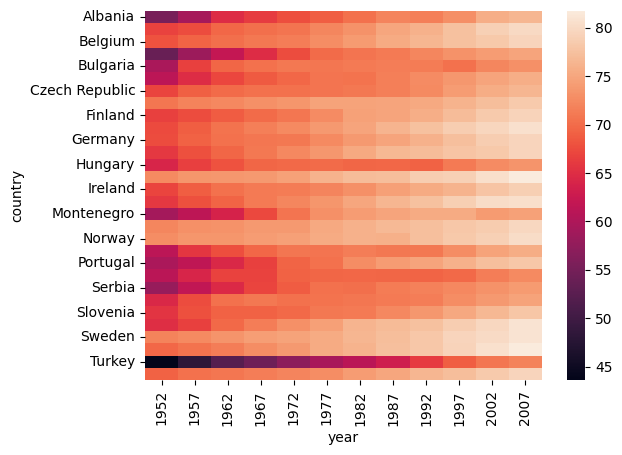

In [62]:
sns.heatmap(data=temp_df)

<Axes: xlabel='year', ylabel='country'>

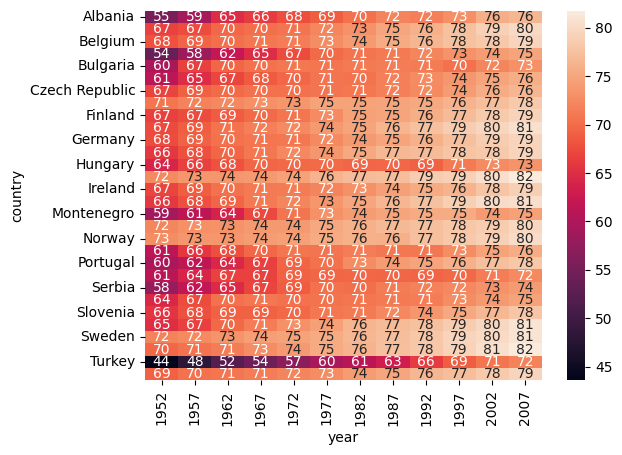

In [ ]:
# We need the values
"""
We can pass annot=True
This will show values as well
"""
plt.figure(figsize=(16, 8))
sns.heatmap(data=temp_df, annot=True)

<Axes: xlabel='year', ylabel='country'>

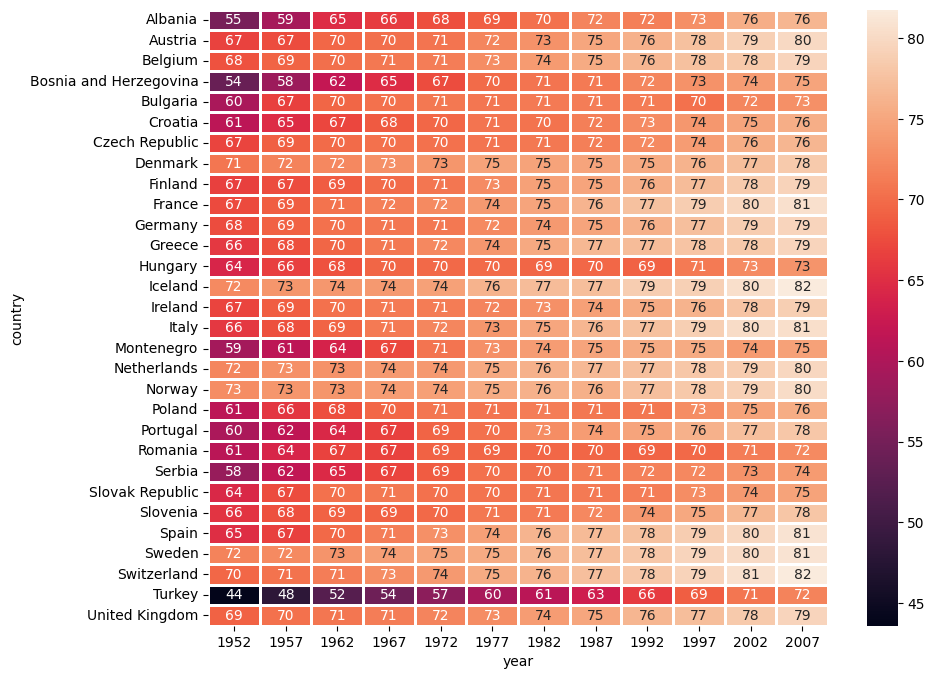

In [66]:
# Add gaps using line widht

plt.figure(figsize=(10, 8))
sns.heatmap(data=temp_df, annot=True, linewidths=1)

<Axes: xlabel='year', ylabel='country'>

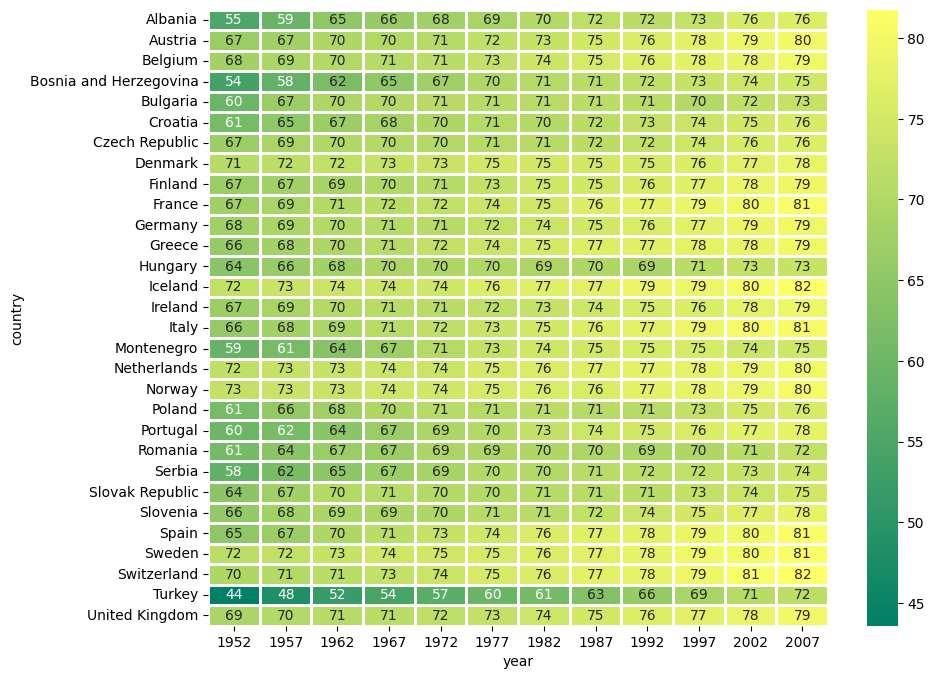

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=temp_df, annot=True, linewidths=1, cmap="summer")

#### **Cluster Map**

Very similar to heatmao, but internally cluster the similar columns together and seperate the dissimilar columns together.

Plot a matrix dataset as a hierarchically-clustered heatmap.

This function requires scipy to be available.


In [69]:
px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


**We need to identify the similar columns**
**and which flowers are similar to each other**


In [70]:
iris = px.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [75]:
# all rows and 4 cols
sns.clustermap(iris.iloc[:, [0, 1, 2, 3]])

RuntimeError: clustermap requires scipy to be available

This cluster map is also known as Dendo Gram

Clustermap internally uses Agglomerative Heirarchical Clustering
